In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy import signal

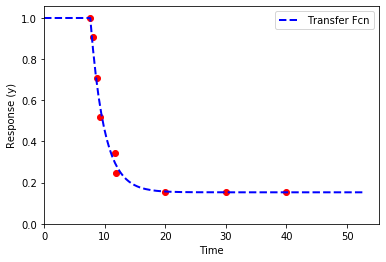

In [4]:
optimised_value_tau = 2.292929292929293

############################################
points = pd.DataFrame({'t': [7.62,8.08,8.69,9.22,11.73,11.85,20,30,40], 'd': [1,0.906,0.706,0.52,0.346,0.247,0.153,0.153,0.153]})

K=1
pre=1
final =0.153
delay = 7.62

num = [K]
den = [optimised_value_tau,1]
sys1 = signal.TransferFunction(num,den)
t1,y1 = signal.step(sys1, T=np.linspace(0,45,100))

y1 = pre-(pre-final)*y1
t1 = pd.Series(t1 +delay)
pre_t = pd.Series(np.linspace(0,delay,100))
t1 = pre_t.append(t1,ignore_index=True)

y1 = pd.Series(y1)
pre_y = pd.Series(np.zeros(100) +1)
y1 = pre_y.append(y1, ignore_index=True)


plt.figure(1)
plt.plot(t1,y1,'b--',linewidth=2,label='Transfer Fcn')
plt.scatter(points['t'],points['d'], color='r')
plt.xlabel('Time')
plt.ylabel('Response (y)')
plt.ylim(0)
plt.xlim(0)
plt.legend(loc='best')
#plt.savefig("Pericyte response LS fit Ischaemia")
plt.show()

Text(0, 0.5, 'phi')

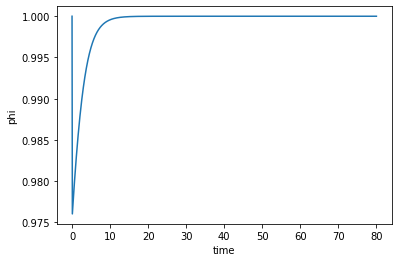

In [23]:
no = 1000
max_time = 80

#For a capillary. 
D_baseline = 8 # micro m 
F_baseline = 0.008663
optimised_value_tau = 2.292929292929293
phi_min_baseline = 0.153
resistance_baseline = 6.016773

n=1

f = pd.Series(np.zeros(no))
f[0] = 0.1
t = np.linspace(0,max_time,no)
phi = pd.Series(np.zeros(no))
phi[0]=1
phi_min = pd.Series(np.zeros(no))
phi_min[0] = 1-(1-phi_min_baseline)*(1-f[0])**n
dphidt = pd.array(np.zeros(no))

dt = max_time/(no-1)

for i in range(no-1):
    dphidt[i] = (1/optimised_value_tau)*( -phi[i] + f[i]*(1-phi_min[i]) + phi_min[i] )
    phi[i+1] = dphidt[i]*dt + phi[i]
    f[i+1] = (phi[i+1]**4)
    phi_min[i+1] = 1-(1-phi_min_baseline)*(1-f[i+1])**n

#n=1
#phi_min = 1 - (1 - phi_min_baseline)*(1-f)**n
#initial condition

# plot results
plt.plot(t,phi)
plt.xlabel('time')
plt.ylabel('phi')

Text(0, 0.5, 'f')

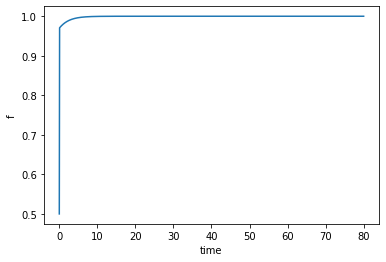

In [22]:
# plot results
plt.plot(t,f)
plt.xlabel('time')
plt.ylabel('f')

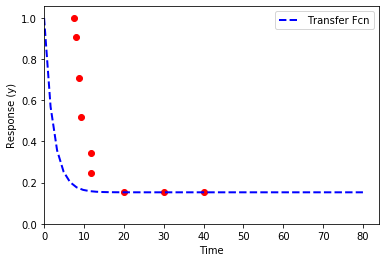

In [39]:
points = pd.DataFrame({'t': [7.62,8.08,8.69,9.22,11.73,11.85,20,30,40], 'd': [1,0.906,0.706,0.52,0.346,0.247,0.153,0.153,0.153]})

plt.figure(1)
plt.plot(t,phi,'b--',linewidth=2,label='Transfer Fcn')
plt.scatter(points['t'],points['d'], color='r')
plt.xlabel('Time')
plt.ylabel('Response (y)')
plt.ylim(0)
plt.xlim(0)
plt.legend(loc='best')
plt.show()

In [24]:
dphidt

<PandasArray>
[  -0.2992111453744493,  0.007292424324663344,  0.007184480831311461,
  0.007074969262854131,  0.006964038845200928,  0.006851838444151685,
 0.0067385161323821685,  0.006624218771229445, 0.0065090916092224145,
  0.006393277899114524,
 ...
 6.778718555640824e-16, 6.778718555640824e-16, 6.778718555640824e-16,
 6.778718555640824e-16, 6.778718555640824e-16, 6.778718555640824e-16,
 6.778718555640824e-16, 6.778718555640824e-16, 6.778718555640824e-16,
                   0.0]
Length: 1000, dtype: float64